In [6]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.spatial.distance import cdist

In [7]:
var = pickle.load(open("ADP_Iterations/var.pkl", "rb"))

gra_list = var['gra_list']
iterations = var['iter']
total = var['total']
background_percent = var['back_percent']
test_size = var['test_size']
b_test = var['b_test']

iterations = 1

In [8]:
def probability(df):
    s = np.sum(df, axis=0)
    m = len(df)
    mu = s/m
    vr = np.sum((df - mu)**2, axis=0)
    variance = vr/m
    var_dia = np.diag(variance)
    k = len(mu)
    X = df - mu
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(var_dia)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(var_dia) * X,axis=1))
    return p

In [9]:
def EDA_calc (data, metric='euclidean'):
    L, W = data.shape
    EDA = {}
    
    dist = cdist(data, data, metric=metric)
    
    EDA['Centrality'] = 1/np.sum(dist,axis=0)
    EDA['CumulativeProximity'] = np.sum(dist**2,axis=0)
    EDA['SquareCentrality'] = 1/EDA['CumulativeProximity']
    EDA['Eccentricity'] = 2*EDA['CumulativeProximity']/np.sum(EDA['CumulativeProximity'])
    EDA['Density'] = L/EDA['Eccentricity']
    EDA['Probability'] = probability(data)
    
    
    return EDA

------------------- mahalanobis -------------------


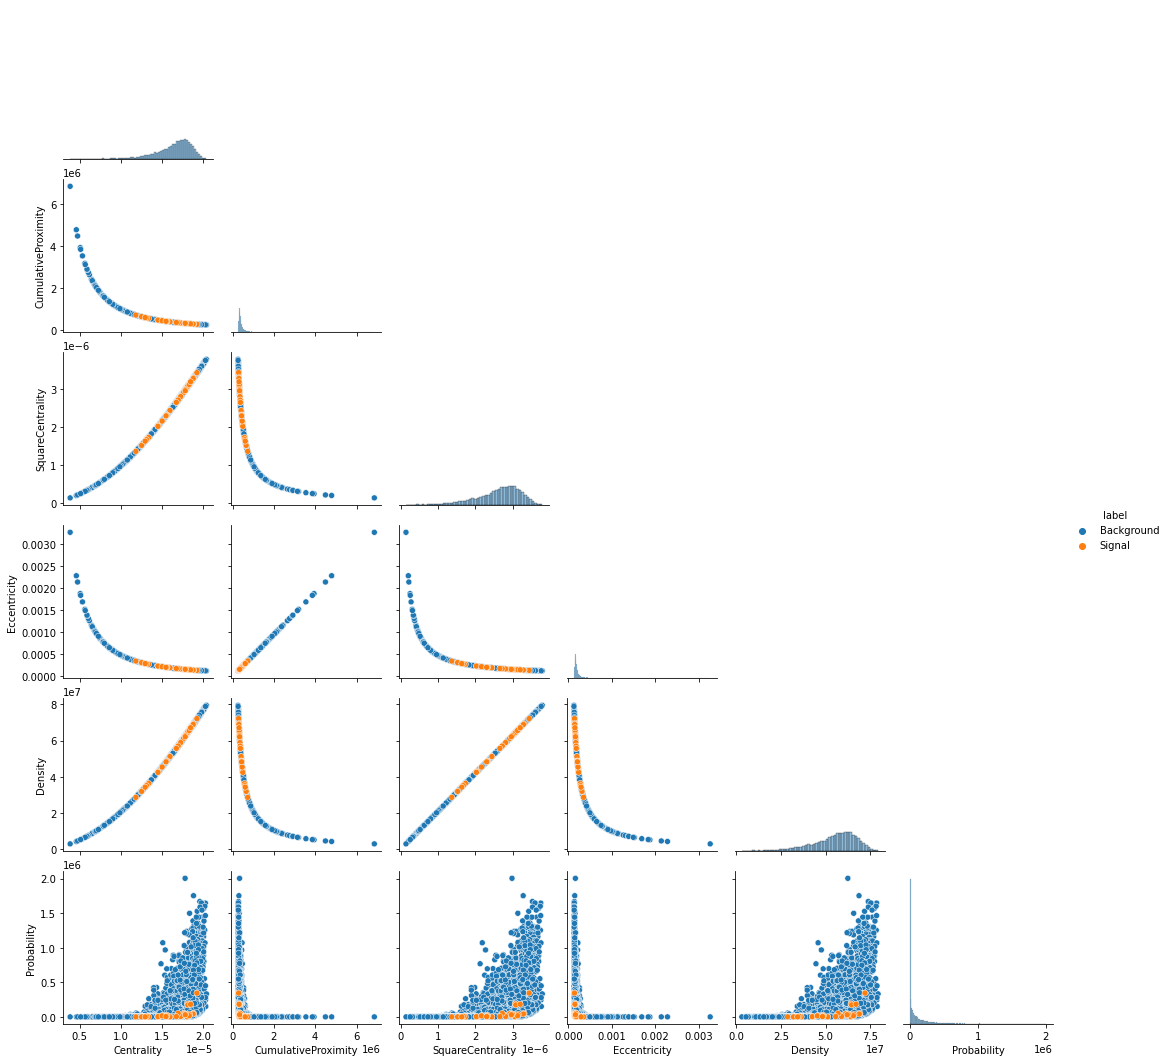

------------------- cosine -------------------


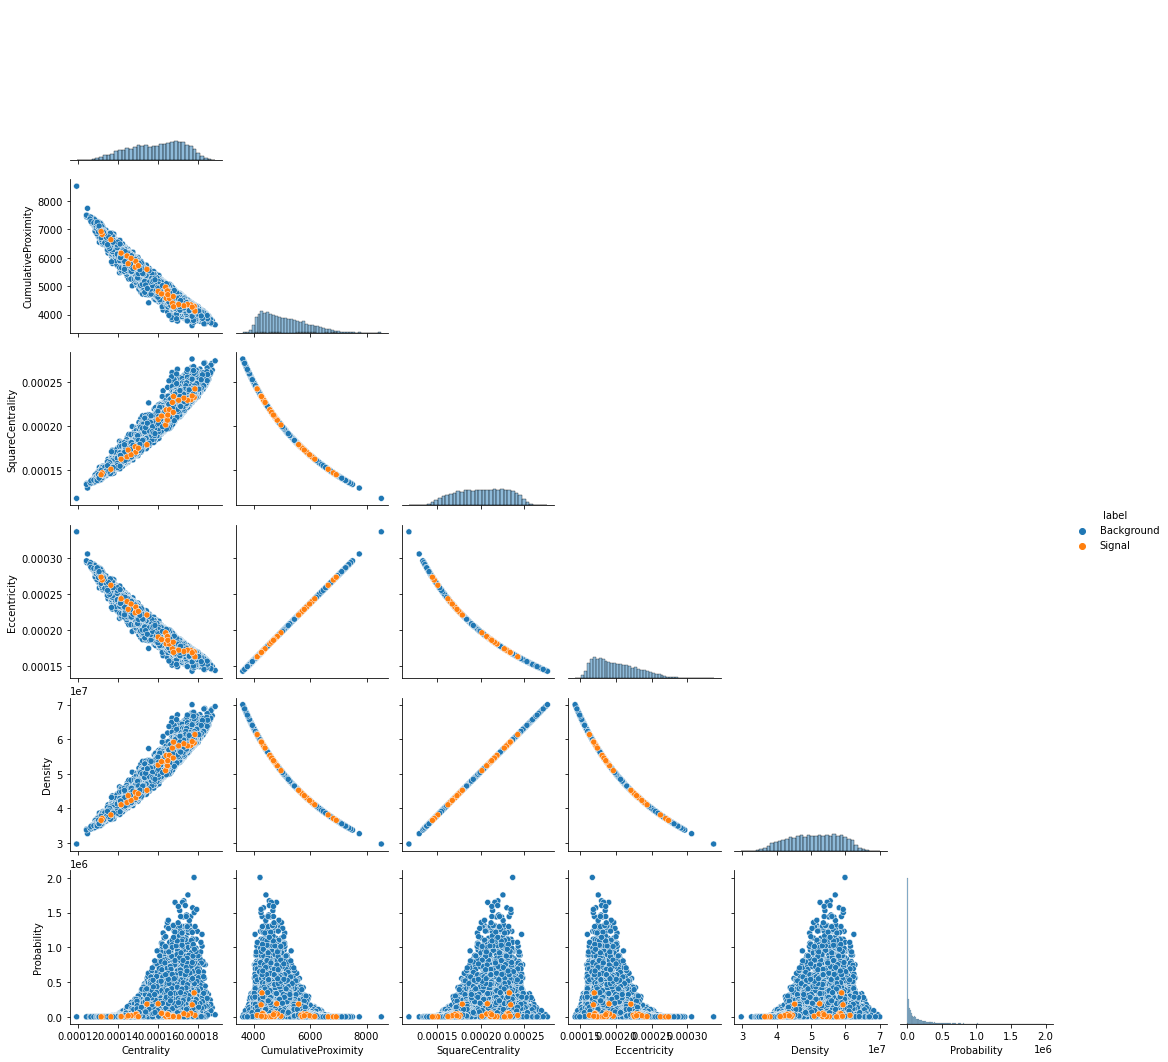

------------------- euclidean -------------------


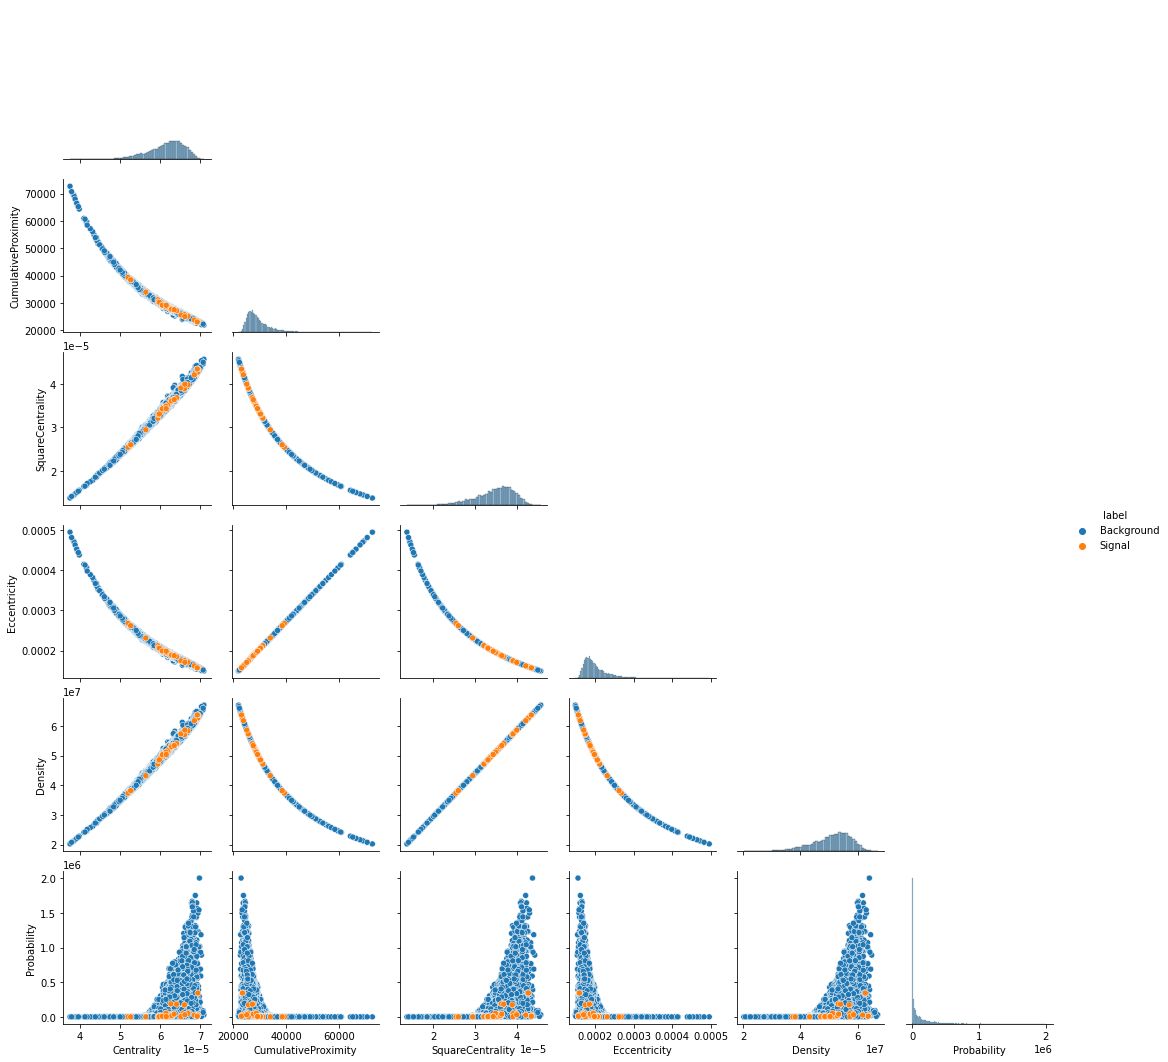

------------------- Centrality -------------------


C:\Users\mathe\Anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


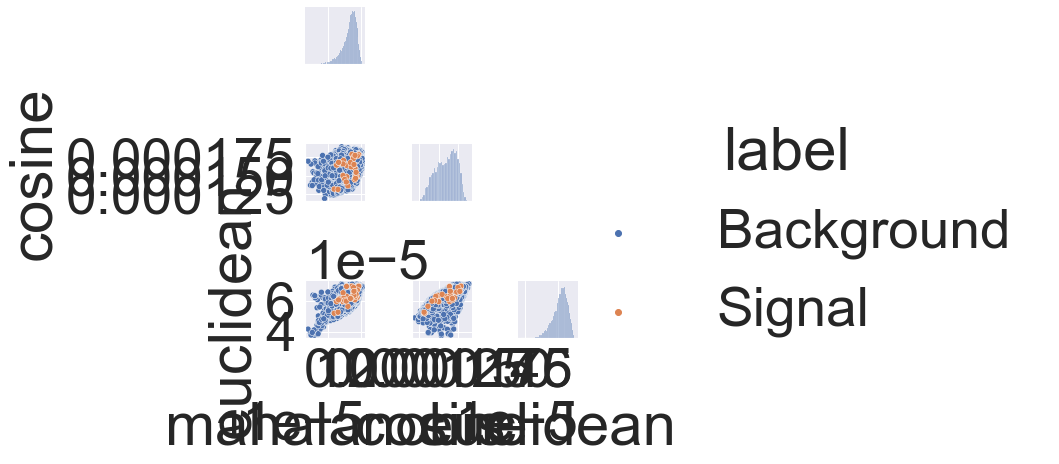

------------------- CumulativeProximity -------------------


C:\Users\mathe\Anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


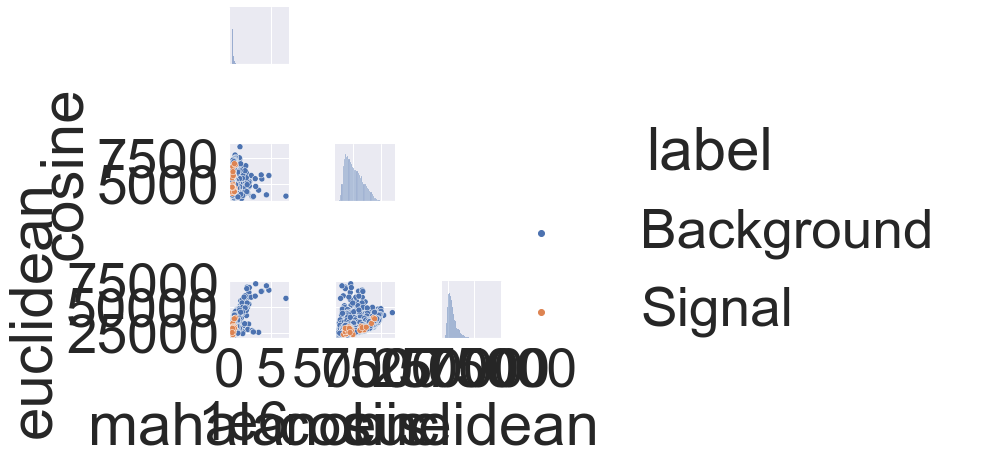

------------------- SquareCentrality -------------------


C:\Users\mathe\Anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


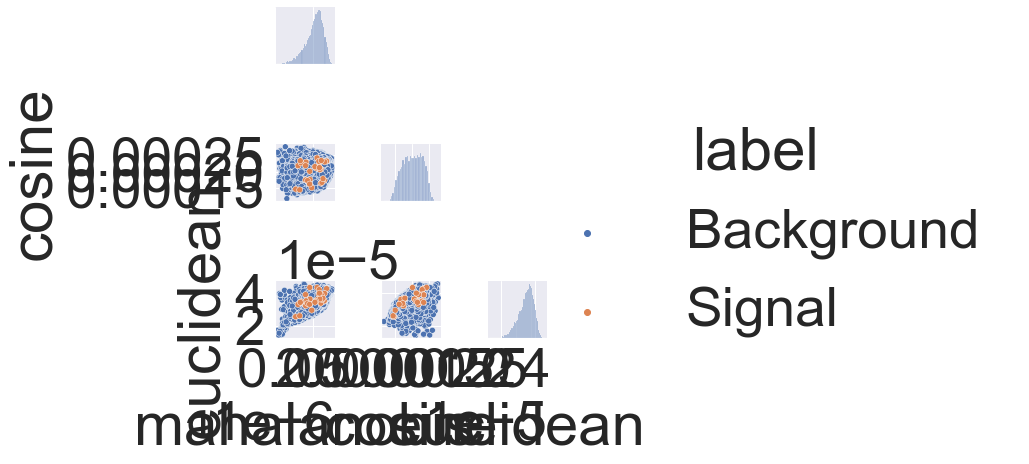

------------------- Eccentricity -------------------


C:\Users\mathe\Anaconda3\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


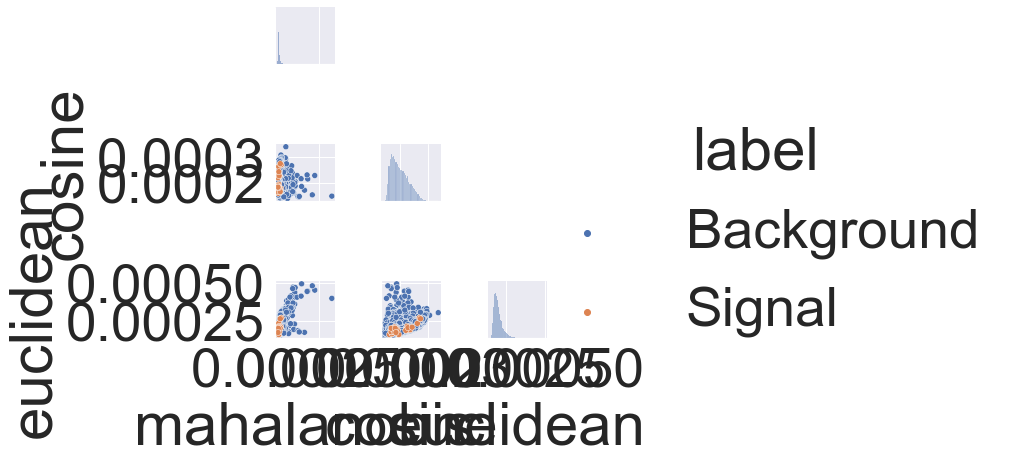

------------------- Density -------------------


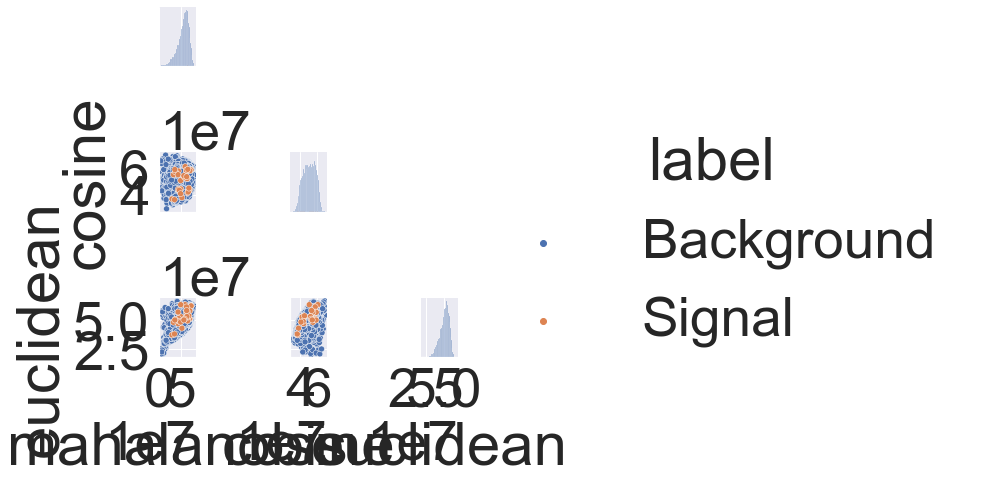

------------------- Probability -------------------


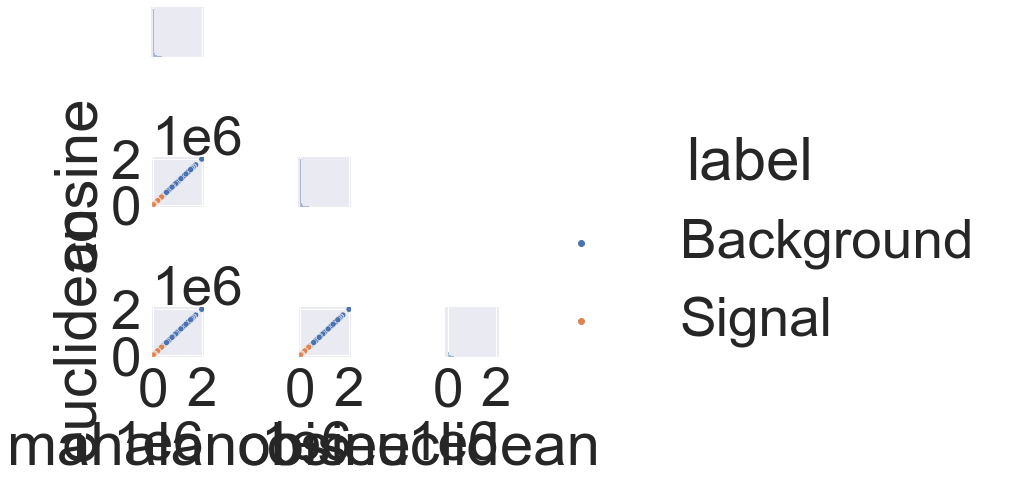

In [10]:
for n_i in range(iterations):
    ##################################################################
    # ------------------ LER OS DADOS DA ITERAÇÃO ------------------ #
    # -------------------------------------------------------------- #
    static = pickle.load(open("ADP_Iterations/Static_Iter{}.pkl".format(n_i), "rb"))
    streaming = pickle.load(open("ADP_Iterations/Streaming_Iter{}.pkl".format(n_i), "rb"))
    data = np.concatenate((static,streaming), axis=0)
    L, W = data.shape
    L1, _ = static.shape
    L2, _ = streaming.shape
    label = (L1+b_test)*['Background'] + (L2-b_test)*['Signal']
    
    distances = ['mahalanobis', 'cosine', 'euclidean']
    df_list = []
    for metric in distances:
        print('-------------------', metric, '-------------------')
        params = EDA_calc(data, metric)
        params['label'] = label
        df = pd.DataFrame.from_dict(params)
        sns.pairplot(df, hue='label', diag_kind='hist', corner=True)
        df_list.append(df)
        plt.show()
        
    EDA_names = df_list[0].columns
    for EDA in EDA_names[:-1]:
        print('-------------------', EDA, '-------------------')
        aux_df = pd.concat([df_list[i][EDA] for i in range(3)], axis=1)
        aux_df.columns = distances
        aux_df['label'] = label
        sns.set(font_scale=1.5)
        sns.pairplot(aux_df, hue='label', diag_kind='hist', corner=True)
        plt.show()

------------------- Centrality -------------------


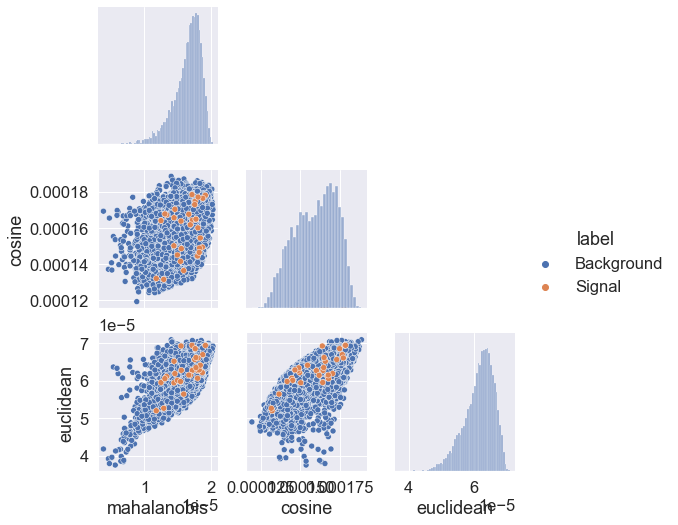

------------------- CumulativeProximity -------------------


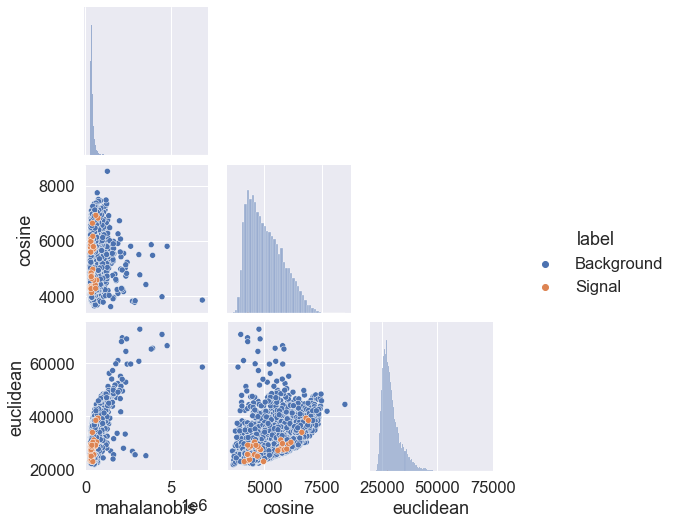

------------------- SquareCentrality -------------------


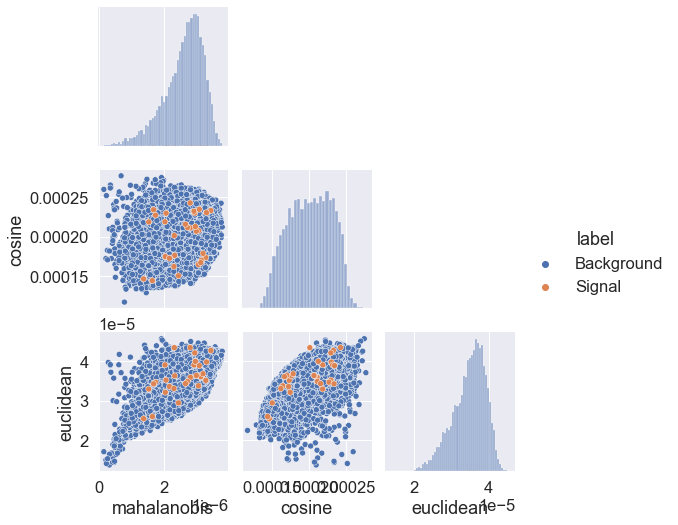

------------------- Eccentricity -------------------


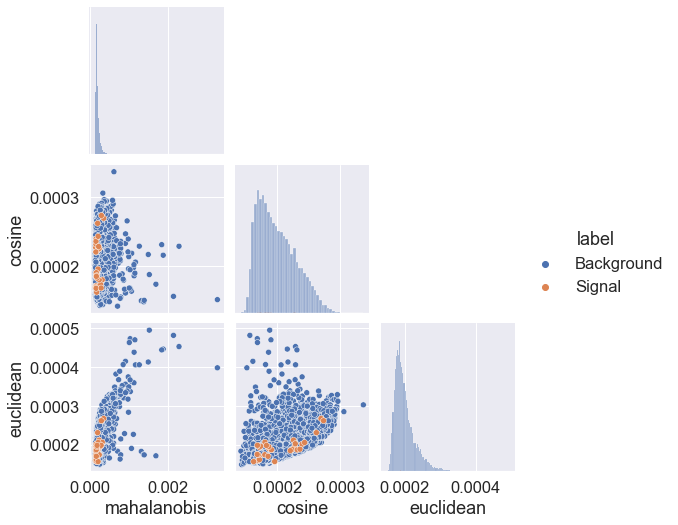

------------------- Density -------------------


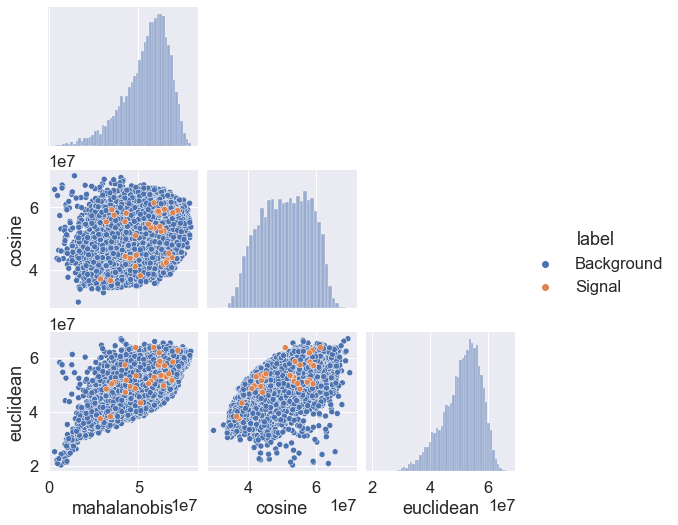

------------------- Probability -------------------


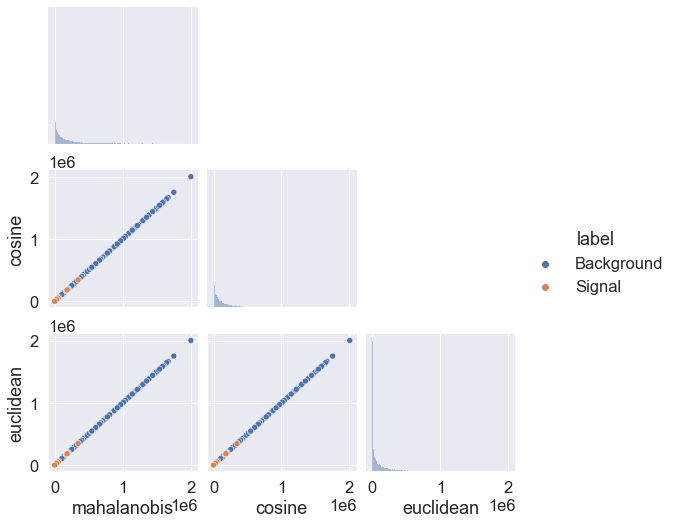

In [11]:
EDA_names = df_list[0].columns
for EDA in EDA_names[:-1]:
    print('-------------------', EDA, '-------------------')
    aux_df = pd.concat([df_list[i][EDA] for i in range(3)], axis=1)
    aux_df.columns = distances
    aux_df['label'] = label
    sns.set(font_scale=1.5)
    sns.pairplot(aux_df, hue='label', diag_kind='hist', corner=True)
    plt.show()